In [23]:
!pip install DecisionTree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 335 kB 5.0 MB/s 
  Created wheel for DecisionTree: filename=DecisionTree-3.4.3-py3-none-any.whl size=81846 sha256=0a9456b39ff34ba7b78be24d2e6f626fc8b20fed91afeb0f84a8b71927dc4302
  Stored in directory: /root/.cache/pip/wheels/6b/0f/8f/433fa867b446f25532b21dea6d4f45e5eee707510cf7a5189a
Successfully built DecisionTree


In [25]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [26]:
df_Numeric = pd.read_excel(r"mergeHome_Numeric.xlsx")
df_Numeric.drop("Unnamed: 0", axis = 1, inplace = True)

# Bagımlı Degisken -> Fiyat
# Bagımsız Degisken ayrımı -> Fiyaat dşındaki özellikler

X = df_Numeric.drop(["Fiyat"], axis = 1)
y = df_Numeric["Fiyat"]

Train and Test Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)

Model Traning

In [30]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

Metrics

Training score:  0.9989837924535885
MSE: 64656805.47
RMSE: 8040.95
R2:  0.27420107047717956
MAE:  5225.670857988166
MAPE:  5225.670857988166


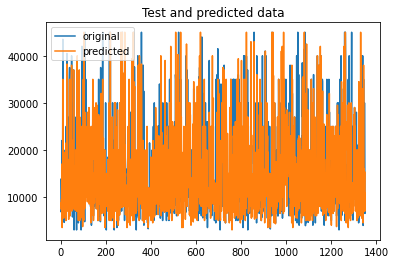

In [31]:
score = dtr.score(X_train, y_train)  
print("Training score: ", score)

y_pred = dtr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE: ", mae)

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

One Home

In [32]:
new_data = [[2],[61],[50],[10],[15],[5],[0],[31]]


new_data = pd.DataFrame(new_data).T

df_new = new_data.rename(columns={
     0: "Oda_Sayisi",
     1: "Brut",
     2: "Net",
     3: "Bulundugu_Kat",
     4: "Bina_Yas",
     5: "Isitma_Tipi",
     6: "Esya_Durumu",
     7: "Ilce"})

pred = dtr.predict(df_new)
pred

#7500

array([7500.])